# Summary
This notebook looks at the groupbys of AM traffic to the Loop and PM traffic from the loop, to determine which census tracts need to be kept track of.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import the morning taxi rides to and from the loop
df_am_to_loop = pd.read_json('Data/am_to_loop.json')
df_pm_from_loop = pd.read_json('Data/pm_from_loop.json')

In [8]:
#list of census tracts in the Loop.
loop_tracts = [17031320100, 17031320400, 17031320600, 17031839000, 17031839100]

Do some groupby operations and check what I need to do for the full data set.

In [3]:
fare_df = pd.DataFrame(df_am_to_loop.groupby('Pickup Census Tract').mean()['fare'])
fare_df2 = pd.DataFrame(df_pm_from_loop.groupby('Dropoff Census Tract').mean()['fare'])

In [4]:
fare_df.columns = ['mean_fare']
fare_df2.columns = ['mean_fare']

In [5]:
fare_df['std_fare'] = df_am_to_loop.groupby('Pickup Census Tract').std()['fare']
fare_df['count'] = df_am_to_loop.groupby('Pickup Census Tract').count()['fare']
fare_df['percentage'] = df_am_to_loop.groupby('Pickup Census Tract').count()['fare'] / sum(fare_df['count'])

In [6]:
fare_df.head()

,mean_fare,std_fare,count,percentage
Pickup Census Tract,,,,
17031010300,25.681707,1.901340,41,0.000011
17031010400,24.328571,2.375545,7,0.000002
17031010501,24.187719,2.625880,114,0.000029
17031010502,23.529286,2.580775,70,0.000018
17031010503,22.104412,2.937283,34,0.000009


In [7]:
fare_df2['std_fare'] = df_pm_from_loop.groupby('Dropoff Census Tract').std()['fare']
fare_df2['count'] = df_pm_from_loop.groupby('Dropoff Census Tract').count()['fare']
fare_df2['percentage'] = df_pm_from_loop.groupby('Dropoff Census Tract').count()['fare'] / sum(fare_df2['count'])

In [8]:
fare_df2.head()

,mean_fare,std_fare,count,percentage
Dropoff Census Tract,,,,
17031010100,28.322727,6.260885,11,0.000002
17031010201,26.177273,8.854952,11,0.000002
17031010202,26.463636,7.180184,11,0.000002
17031010300,25.826770,4.153197,226,0.000032
17031010400,23.507521,3.429664,359,0.000050


The standard deviations are huge for some rows. This appears to be due to outliers that are most likely mis-entered numbers. What I list below are some taxi rides within the Loop with fares over $1000. I suppose it's possible that some of these huge fares are from super luxurious rides, but those are rare anyway and I shouldn't have to worry too much about disregarding them.

In [9]:
df_am_to_loop[df_am_to_loop['Pickup Census Tract'] == 17031839100][df_am_to_loop['fare'] > 1000]['fare']

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


101738946    7000.56
104047929    9000.58
109255333    5000.46
109775262    7000.50
109961631    1690.66
23061681     7000.64
26688253     2020.20
28093267     3963.92
29876436     1000.72
30969951     1551.94
33426775     5000.47
33731569     7000.50
36736947     1000.70
37514052     8000.52
41529307     3000.40
42477628     9001.84
42987227     4000.44
47582308     5000.50
49333203     6000.74
4952192      2271.50
57880835     4000.48
609207       5000.46
66750185     7000.56
68556552     1600.08
69047545     2000.68
69220261     7000.72
74568598     6000.46
78212470     1000.34
80506905     6000.80
81033236     6665.64
82433378     6000.58
83011738     1000.70
83724776     4001.44
97101110     7000.54
99110289     7000.60
Name: fare, dtype: float64

So, I need to find a way to omit outliers in a defensible way, and then I can simply use census tracts as proxy for fares.

Now, see how many census tracts I should keep track of. I should spend memory and computational resources looking at census tracts that only get 0.1% of total traffic.

In [10]:
ratios = np.array(fare_df.sort_values(by='percentage', ascending=False)['percentage'])
ratios_log = np.log(np.array(fare_df.sort_values(by='percentage', ascending=False)['percentage']))

In [11]:
ratios[:30]

array([ 0.1160265 ,  0.10203468,  0.10122042,  0.06762828,  0.06282786,
        0.04693577,  0.03985889,  0.03868702,  0.03701185,  0.03102382,
        0.02712041,  0.02620148,  0.02581601,  0.0247135 ,  0.02470731,
        0.01776606,  0.01579231,  0.01318144,  0.01254639,  0.01230892,
        0.01192912,  0.01121852,  0.0098329 ,  0.00971713,  0.00969135,
        0.00685384,  0.00568455,  0.00552057,  0.00532151,  0.00497266])

In [12]:
ratios2 = np.array(fare_df2.sort_values(by='percentage', ascending=False)['percentage'])
ratios2_log = np.log(np.array(fare_df2.sort_values(by='percentage', ascending=False)['percentage']))

In [13]:
ratios2[:30]

array([ 0.10460638,  0.0690915 ,  0.0673416 ,  0.05943597,  0.05793944,
        0.04463791,  0.0424464 ,  0.03928429,  0.03784925,  0.03133721,
        0.02979264,  0.02807356,  0.02744693,  0.02534016,  0.02398411,
        0.02348999,  0.02051387,  0.0166855 ,  0.01457663,  0.01341737,
        0.01121578,  0.01056437,  0.01013733,  0.00986477,  0.00959432,
        0.00919361,  0.0090852 ,  0.00713628,  0.00699314,  0.00686527])

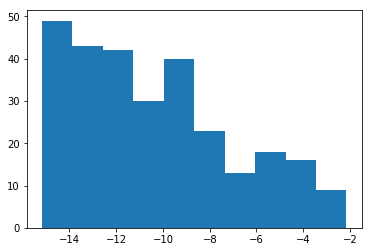

In [14]:
plt.hist(ratios_log)
plt.show()

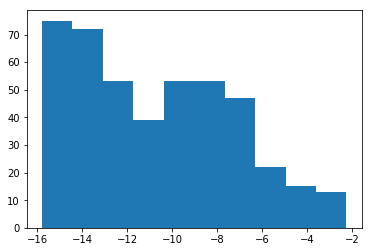

In [15]:
plt.hist(ratios2_log)
plt.show()

How many census tracts have more than a certain proportion of total rides?

In [16]:
print(sum(ratios > 0.01))
print(sum(ratios > 0.005))
print(sum(ratios > 0.001))

22
29
48


In [17]:
print(sum(ratios2 > 0.01))
print(sum(ratios2 > 0.005))
print(sum(ratios2 > 0.001))

23
33
73


How many census tracts do we need to get X % of the rides?

In [18]:
print(sum(ratios.cumsum() < 0.99))
print(sum(ratios.cumsum() < 0.95))
print(sum(ratios.cumsum() < 0.9))

61
35
25


In [19]:
print(sum(ratios2.cumsum() < 0.99))
print(sum(ratios2.cumsum() < 0.95))
print(sum(ratios2.cumsum() < 0.9))

118
59
36


I will keep 36 census tracts, to cover 90% of the PM traffic from the Loop. See how well the rush hour census tracts overlap.

In [20]:
top_25_census_tracts = np.array(fare_df.sort_values(by='percentage', ascending=False).index[:25])

In [21]:
top_25_census_tracts

array([17031839100, 17031320100, 17031281900, 17031280100, 17031081500,
       17031081403, 17031081800, 17031980000, 17031081700, 17031081401,
       17031081300, 17031081201, 17031330100, 17031081600, 17031320400,
       17031081000, 17031320600, 17031980100, 17031080100, 17031081402,
       17031833100, 17031081100, 17031071500, 17031080202, 17031081202])

In [22]:
top_36_census_tracts = np.array(fare_df2.sort_values(by='percentage', ascending=False).index[:36])

In [23]:
set(top_25_census_tracts) - set(top_36_census_tracts)

set()

All members of top 36 are in the top 25.

In [24]:
top_36_census_tracts

array([17031839100, 17031281900, 17031320100, 17031081500, 17031081700,
       17031081403, 17031280100, 17031081800, 17031081201, 17031330100,
       17031833000, 17031081600, 17031980000, 17031081300, 17031320400,
       17031081401, 17031081402, 17031320600, 17031833100, 17031071500,
       17031081000, 17031081202, 17031080300, 17031839000, 17031980100,
       17031081100, 17031080100, 17031838100, 17031071400, 17031080202,
       17031841900, 17031842300, 17031842200, 17031841000, 17031243500,
       17031080201])